In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("steam-200k.csv")
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [3]:
df.rename(columns = {'151603712':'User_ID','The Elder Scrolls V Skyrim':'games','purchase':'Status','1.0':'Hoursplay'},inplace=True)

In [4]:
df.head()

,User_ID,games,Status,Hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [5]:
df.drop(['0'],axis=1,inplace=True)

In [6]:
df.head()

,User_ID,games,Status,Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


In [7]:
df.shape

(199999, 4)

In [8]:
df.columns

Index(['User_ID', 'games', 'Status', 'Hoursplay'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 4 columns):
User_ID      199999 non-null int64
games        199999 non-null object
Status       199999 non-null object
Hoursplay    199999 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [10]:
df.isnull().sum()

User_ID      0
games        0
Status       0
Hoursplay    0
dtype: int64

In [11]:
df.nunique()

User_ID      12393
games         5155
Status           2
Hoursplay     1593
dtype: int64

In [12]:
df['games'].value_counts()

Dota 2                                                 9682
Team Fortress 2                                        4646
Counter-Strike Global Offensive                        2789
Unturned                                               2632
Left 4 Dead 2                                          1752
Counter-Strike Source                                  1693
Counter-Strike                                         1424
Garry's Mod                                            1397
The Elder Scrolls V Skyrim                             1393
Warframe                                               1271
Half-Life 2 Lost Coast                                 1158
Sid Meier's Civilization V                             1150
Robocraft                                              1096
Half-Life 2 Deathmatch                                 1021
Portal                                                 1005
Portal 2                                                997
Half-Life 2                             

In [13]:
df['Status'].value_counts()

purchase    129510
play         70489
Name: Status, dtype: int64

In [14]:
df.describe()

,User_ID,Hoursplay
count,1.999990e+05,199999.000000
mean,1.036556e+08,17.874468
std,7.208084e+07,138.057292
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


Visualizing Data

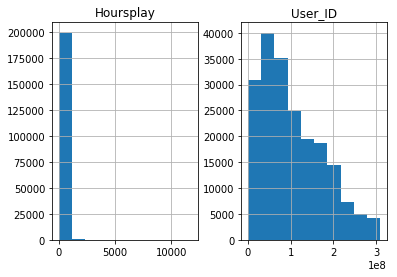

In [15]:
hist = df.hist(bins=10)

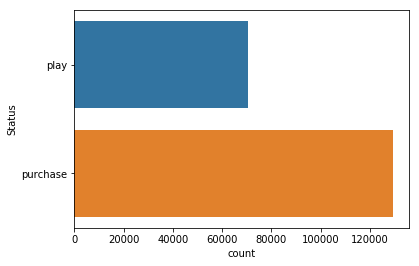

In [16]:
sns.countplot(y='Status',data = df)

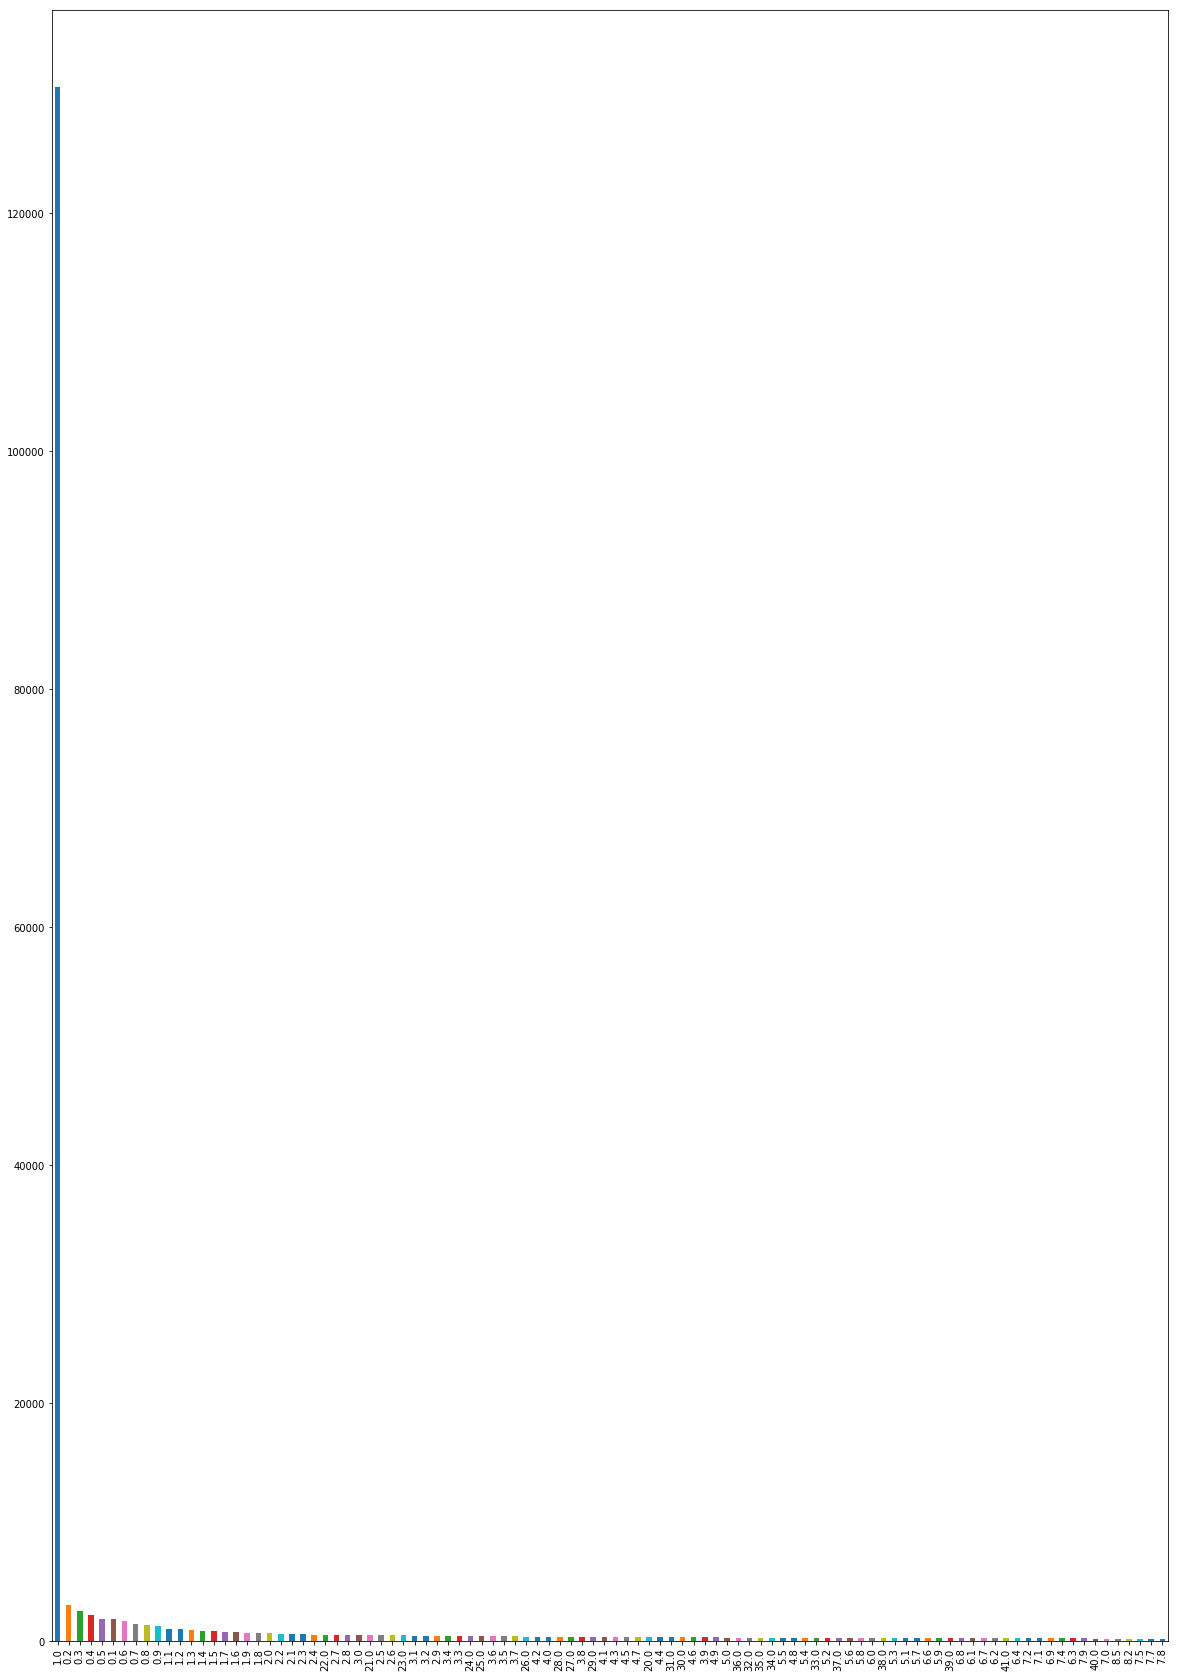

In [17]:
df['Hoursplay'].value_counts().head(100).plot(kind='bar', figsize=(20,30))

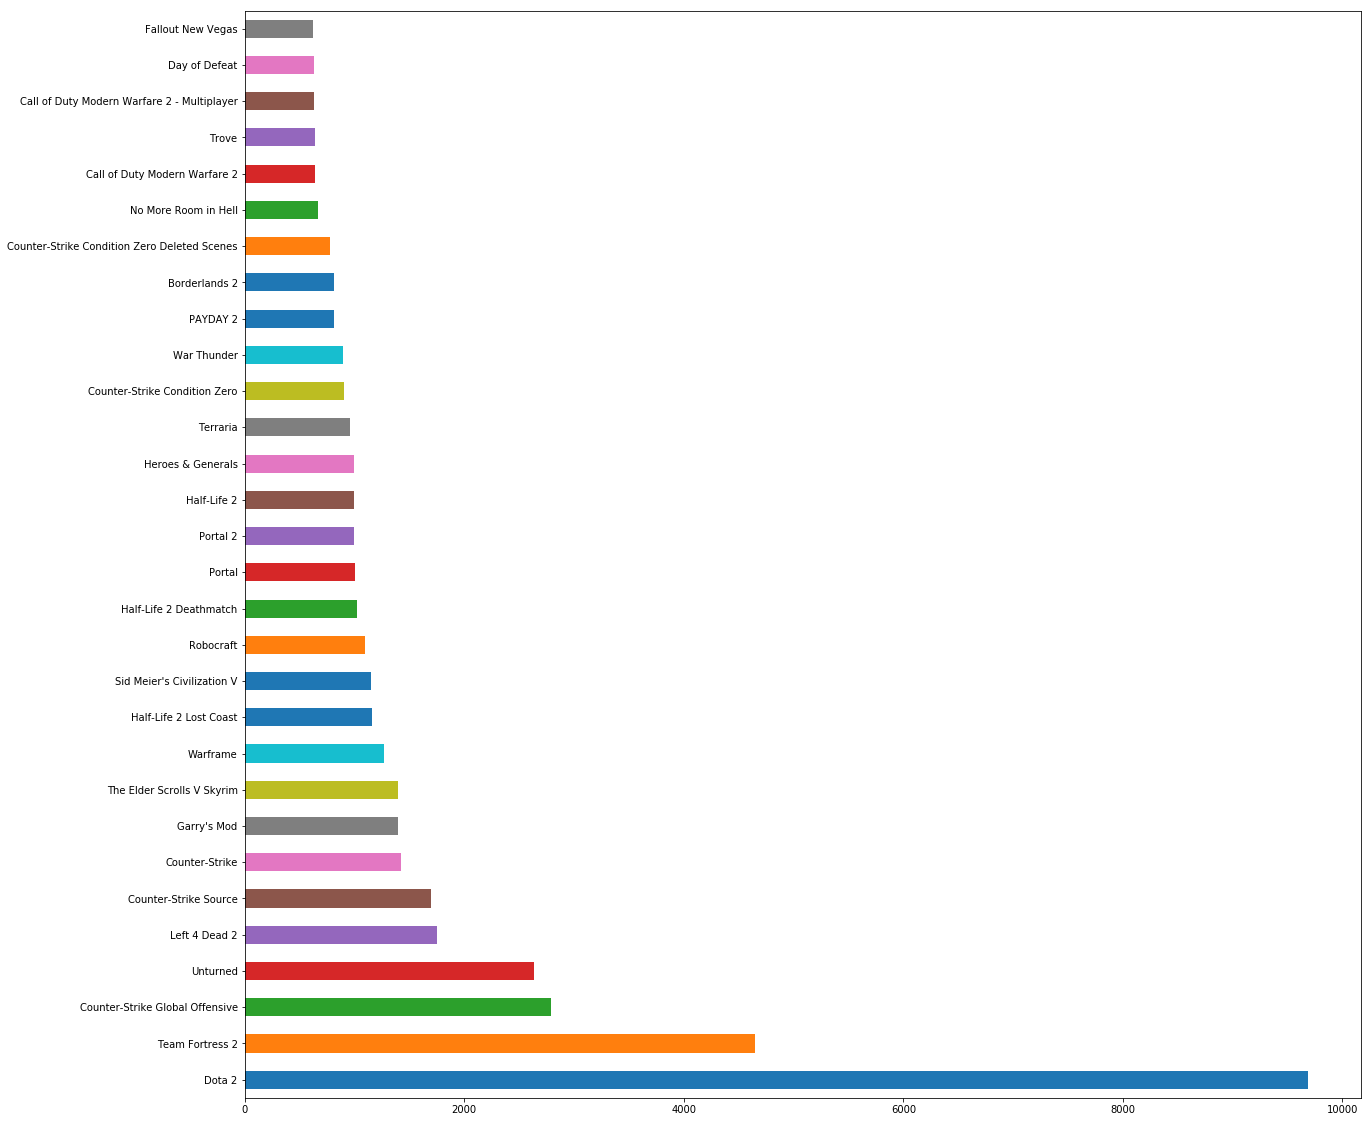

In [18]:
df['games'].value_counts().head(30).plot(kind='barh', figsize=(20,20))

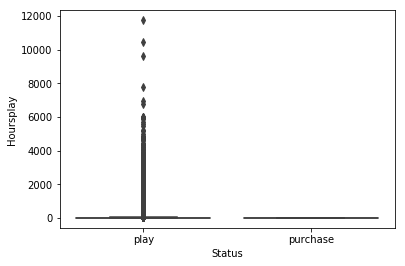

In [19]:
sns.boxplot(x='Status',y='Hoursplay', data=df)

In [20]:
df

,User_ID,games,Status,Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9
5,151603712,Fallout New Vegas,purchase,1.0
6,151603712,Fallout New Vegas,play,12.1
7,151603712,Left 4 Dead 2,purchase,1.0
8,151603712,Left 4 Dead 2,play,8.9
9,151603712,HuniePop,purchase,1.0


In [21]:
#convert hoursplay into rating
df = df[(df['Hoursplay']>=2) & (df['Status']=='play')]
df_filtered = df[df.groupby('games').User_ID.transform(len) >= 20]
df_filtered['games'].nunique()
df_filtered.head()

,User_ID,games,Status,Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,play,87.0
4,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,play,8.9


In [22]:
df_filtered['User_ID'] = df_filtered['User_ID'].astype(str)
averages = df_filtered.groupby(['games'],as_index=False).Hoursplay.mean()
averages['avg_Hoursplay'] = averages['Hoursplay']
averages.drop('Hoursplay',axis=1,inplace=True)

final_ratings = pd.merge(df_filtered,averages[['games','avg_Hoursplay']],on='games')
conditions = [(final_ratings['Hoursplay']>=0.8*final_ratings['avg_Hoursplay']),
             (final_ratings['Hoursplay']>=0.6*final_ratings['avg_Hoursplay']) & (final_ratings['Hoursplay']<0.8*final_ratings['avg_Hoursplay']),
             (final_ratings['Hoursplay']>=0.4*final_ratings['avg_Hoursplay']) & (final_ratings['Hoursplay']<0.6*final_ratings['avg_Hoursplay']),
             (final_ratings['Hoursplay']>=0.2*final_ratings['avg_Hoursplay']) & (final_ratings['Hoursplay']<0.4*final_ratings['avg_Hoursplay']),
             final_ratings['Hoursplay']>=0,]
values = [5,4,3,2,1]
final_ratings['rating'] = np.select(conditions,values)
final_ratings

,User_ID,games,Status,Hoursplay,avg_Hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5
5,54103616,The Elder Scrolls V Skyrim,play,35.0,115.351792,2
6,56038151,The Elder Scrolls V Skyrim,play,14.6,115.351792,1
7,94088853,The Elder Scrolls V Skyrim,play,320.0,115.351792,5
8,116085629,The Elder Scrolls V Skyrim,play,80.0,115.351792,4
9,148510973,The Elder Scrolls V Skyrim,play,73.0,115.351792,4


In [23]:
final_ratings = final_ratings.drop(['Status','Hoursplay','avg_Hoursplay'],axis=1)

In [24]:
final_ratings.head()

,User_ID,games,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5


In [25]:
from sklearn.metrics.pairwise import pairwise_distances

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
user_item = final_ratings.pivot_table(index='User_ID', columns='games', values='rating')
user_item.head()

games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
User_ID,,,,,,,,,,,,,,,,,,,,,
100053304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100057229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100070732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100168166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
user_item.shape

(8315, 431)

In [29]:
piv_norm = user_item.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)
piv_norm

games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
User_ID,,,,,,,,,,,,,,,,,,,,,
100053304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100057229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100070732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100168166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100208126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100267049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100311267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100322840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
piv_norm.fillna(0,inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:,(piv_norm != 0).any(axis=0)]

In [31]:
import scipy as sp

In [32]:
import operator

In [33]:
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)

In [34]:
item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_norm.T)

In [35]:
item_similarity

array([[ 1.        ,  0.01188939,  0.0239096 , ...,  0.06319149,
         0.06119961, -0.03454534],
       [ 0.01188939,  1.        , -0.0461991 , ..., -0.00828046,
         0.02425556, -0.05103594],
       [ 0.0239096 , -0.0461991 ,  1.        , ...,  0.00199417,
         0.02802221, -0.015766  ],
       ...,
       [ 0.06319149, -0.00828046,  0.00199417, ...,  1.        ,
         0.02396014,  0.        ],
       [ 0.06119961,  0.02425556,  0.02802221, ...,  0.02396014,
         1.        ,  0.02212952],
       [-0.03454534, -0.05103594, -0.015766  , ...,  0.        ,
         0.02212952,  1.        ]])

In [36]:
item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)

In [37]:
user_sim_df

User_ID,100057229,100096071,100311267,100322840,100351493,100359523,100431715,100444456,100519466,100630947,...,994489,9946133,99484728,99640715,99704390,99711581,99713453,99723205,99766416,99802512
User_ID,,,,,,,,,,,,,,,,,,,,,
100057229,1.000000,-0.102897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112023,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.074536,0.000000,0.052849,0.000000,0.000000
100096071,-0.102897,1.000000,0.049862,0.000000,0.000000,0.000000,0.067894,0.000000,-0.154673,-0.186033,...,0.303790,0.036035,0.000000,0.000000,-0.150648,-0.046017,0.000000,0.013983,0.039199,0.000000
100311267,0.000000,0.049862,1.000000,0.000000,-0.004669,0.000000,0.000000,-0.030655,0.178706,0.000000,...,-0.054711,0.280644,0.032827,0.000000,-0.035141,0.645942,0.000000,-0.128874,0.000000,0.000000
100322840,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.259037,0.000000,0.204124,0.000000,0.000000,0.000000
100351493,0.000000,0.000000,-0.004669,0.000000,1.000000,0.000000,0.172433,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100359523,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100431715,0.000000,0.067894,0.000000,0.000000,0.172433,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000
100444456,0.000000,0.000000,-0.030655,0.000000,0.000000,0.000000,0.000000,1.000000,-0.070477,0.000000,...,0.000000,0.000000,-0.155643,0.000000,-0.154365,0.069606,0.000000,0.049353,0.000000,0.000000
100519466,0.112023,-0.154673,0.178706,0.000000,0.000000,0.000000,0.000000,-0.070477,1.000000,0.000000,...,0.000000,0.113640,-0.062890,0.000000,0.085764,0.317290,0.000000,0.190250,0.000000,0.000000


In [38]:
user_similarity[0]

array([ 1.        , -0.10289668,  0.        , ...,  0.05284863,
        0.        ,  0.        ])

In [39]:
def top_game(game):
    count = 1
    print('Similar games to {} include \n'.format(game))
    for item in item_sim_df.sort_values(by = game, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count += 1
    

In [40]:
top_game('Aftermath')

Similar games to Aftermath include 

No. 1: Alice Madness Returns
No. 2: Shadow Warrior
No. 3: Brtal Legend
No. 4: Resident Evil 5 / Biohazard 5
No. 5: Infestation Survivor Stories
No. 6: Call of Juarez Gunslinger
No. 7: The Walking Dead Season Two
No. 8: Grand Theft Auto Vice City
No. 9: Counter-Strike Nexon Zombies
No. 10: Star Conflict


In [41]:
def top_users(user):
    if user not in piv_norm.columns:
        return("No data available on user {}".format(user))
    
    print('Most Similar users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users,sim_values)
    for user,sim in zipped:
        print('User #{0}, similarity value: {1:.2f}'.format(user,sim))

In [42]:
top_users('99484728')

Most Similar users:

User #40289887, similarity value: 0.73
User #16710264, similarity value: 0.71
User #185494712, similarity value: 0.71
User #20566124, similarity value: 0.67
User #49769103, similarity value: 0.67
User #15702351, similarity value: 0.65
User #161139120, similarity value: 0.59
User #45459546, similarity value: 0.58
User #33993318, similarity value: 0.58
User #31385451, similarity value: 0.58


#MODEL BASED COLLABORATIVE FILTERING

In [43]:
from sklearn.neighbors import NearestNeighbors

In [44]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', leaf_size = 30, metric_params=None, n_jobs=-1, n_neighbors=20, p=2, radius=1.0)
model_knn.fit(piv_norm)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=-1, n_neighbors=20, p=2, radius=1.0)

In [45]:
query_index = np.random.choice(piv_norm.shape[0])
distances, indices = model_knn.kneighbors(piv_norm.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(piv_norm.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, piv_norm.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendations for South Park The Stick of Truth:

1: Far Cry 3, with distance of 0.8972038320988731:
2: BioShock 2, with distance of 0.9127763494786726:
3: Saints Row The Third, with distance of 0.9169920259686662:
4: BioShock Infinite, with distance of 0.9171719978258484:
5: Far Cry 3 Blood Dragon, with distance of 0.9193205347317666:
